# Seaborn Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


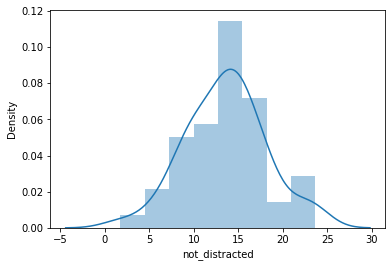

In [4]:
sns.distplot(crash_df['not_distracted'])   #sns.distplot(crash_df['not_distracted'], kde = False (gets rid of the line), bins = 25 (the amount of bars))

#### Joint Plot

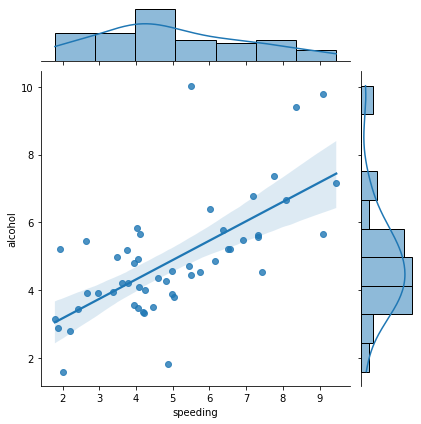

In [5]:
sns.jointplot(x = 'speeding', y = 'alcohol', data = crash_df, kind = 'reg')

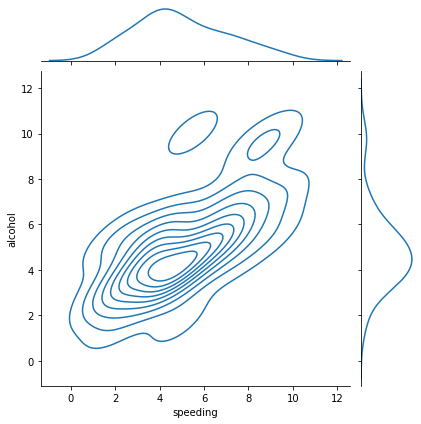

In [6]:
sns.jointplot(x = 'speeding', y = 'alcohol', data = crash_df, kind = 'kde')

### KDE Plot (Kernal Density Estimation (KDE))

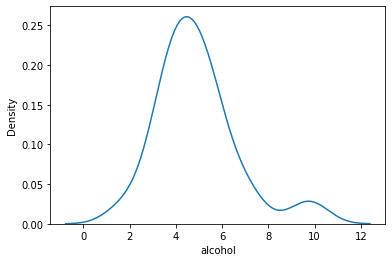

In [7]:
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

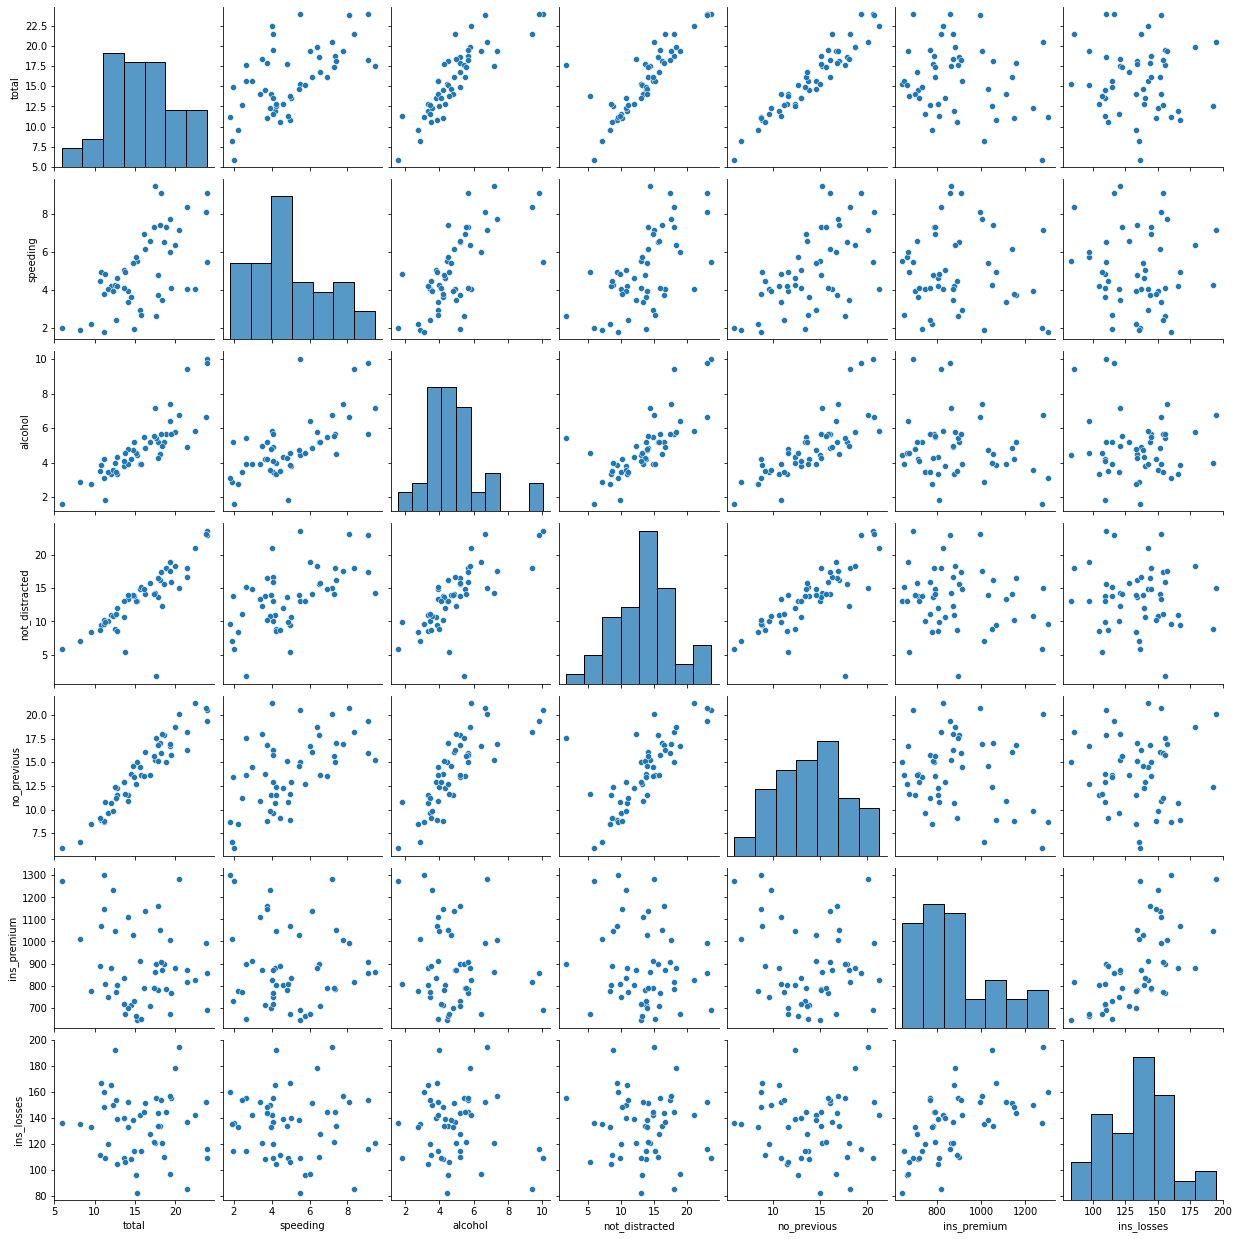

In [8]:
sns.pairplot(crash_df)

In [9]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


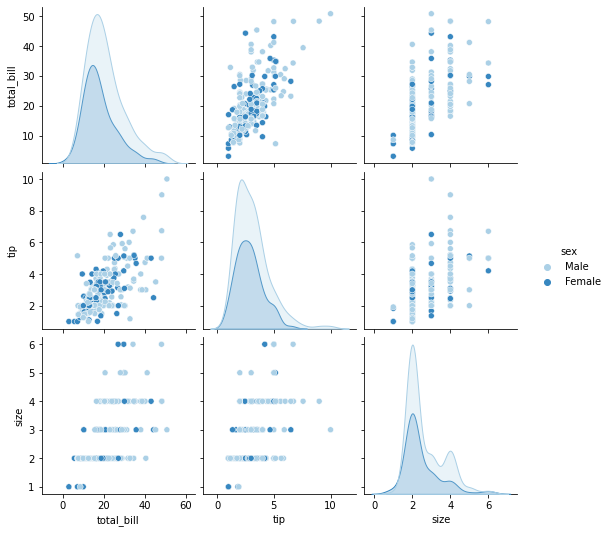

In [10]:
sns.pairplot(tips_df, hue = 'sex', palette = 'Blues')

### Styling

<Figure size 576x288 with 0 Axes>

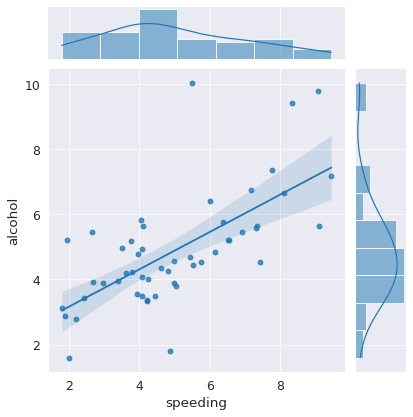

In [11]:
sns.set_style('darkgrid')   #whitegrid is a good option too

plt.figure (figsize = (8, 4))

sns.set_context('paper', font_scale = 1.4)   #relates to x,y axis, can change paper to 'talk' to fit better for presentations

sns.jointplot(x = 'speeding', y = 'alcohol', data = crash_df, kind = 'reg')

# sns.despine(left = True, bottom = True, right = False, Top = True)   will remove the left/right    or top/bottom borders to the graph

### Categorical Plots

### Bar Plots

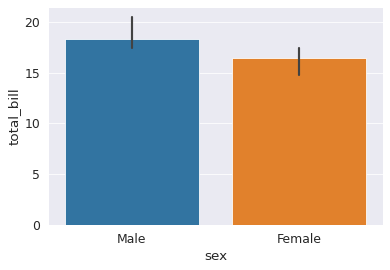

In [12]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips_df, estimator = np.median)    #estimator will change how the data will read, defaults to mean

### Count Plot

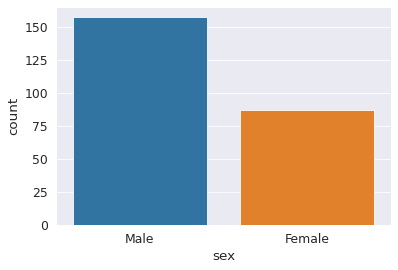

In [13]:
sns.countplot(x = 'sex', data = tips_df)

### Box Plot

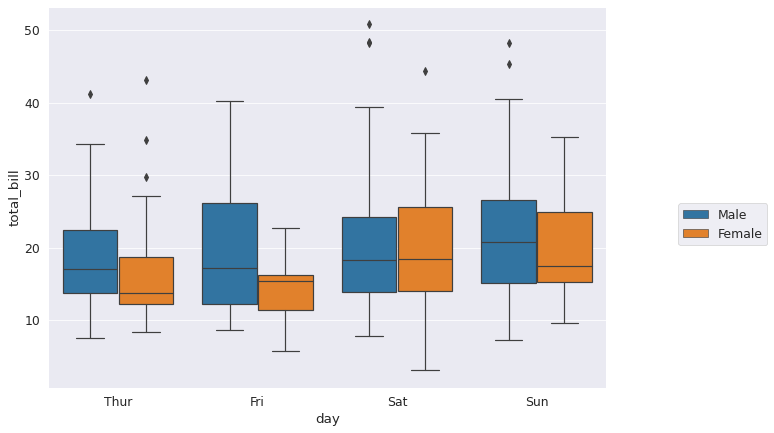

In [14]:
plt.figure(figsize = (10, 7))

sns.boxplot(x = 'day', y = 'total_bill', data = tips_df, hue = 'sex')

plt.legend(loc = 'best', bbox_to_anchor = (0.8, 0, 0.5, 0.5))  #moves the legend to spcified location, another option is to change the figsize
# plt.legend(loc = 0) will keep the legend in the upper left, try numbers 1-10 to move it elsewhere

### Violin Plot

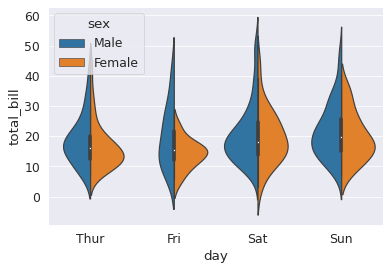

In [15]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips_df, hue = 'sex', split = True)

### Strip Plot

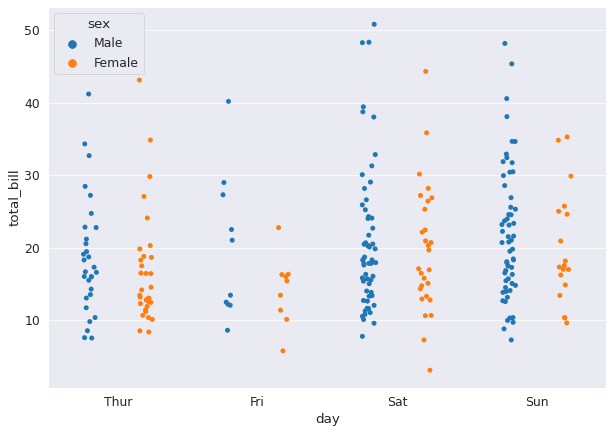

In [16]:
plt.figure(figsize = (10, 7))

sns.stripplot(x = 'day', y = 'total_bill', data = tips_df, jitter = True, hue = 'sex', dodge = True)    #jitter spread the data out some, hue is very useful as it separates the data points from male/female
                                                                                                        #dodge separates the male/female values into different columns

### Swarm Plot

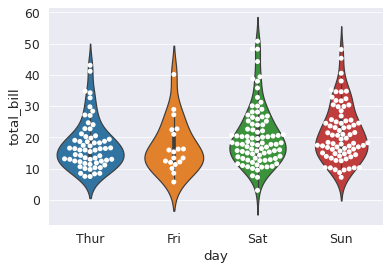

In [17]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips_df)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips_df, color = 'white')    #similar to the violin plot, used the color white to show the similarity to the violin plot

### Palettes

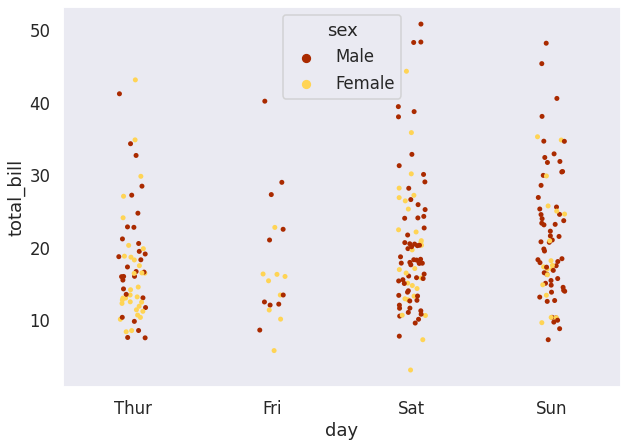

In [18]:
plt.figure(figsize = (10, 7))

sns.set_style('dark')

sns.set_context('talk')

sns.stripplot(x = 'day', y = 'total_bill', data = tips_df, hue = 'sex', palette = 'afmhot')     # check out this link for more palettes:   https://matplotlib.org/stable/tutorials/colors/colormaps.html



### Matrix Plots

### Heatmaps

In [20]:
crash_df.head(1)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.64,18.048,15.04,784.55,145.08,AL


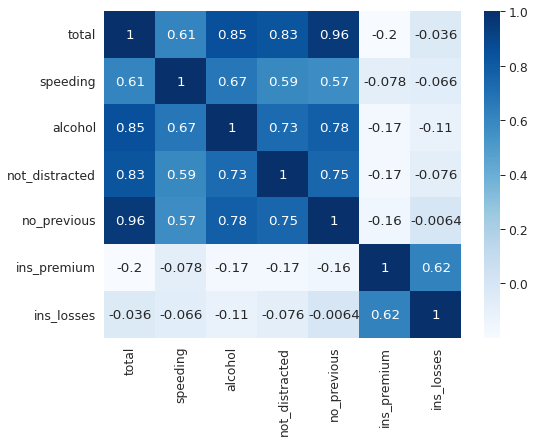

In [24]:
plt.figure(figsize = (8, 6))

sns.set_context('paper', font_scale = 1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot = True, cmap = 'Blues')  #this shows how correlated one variable is to another


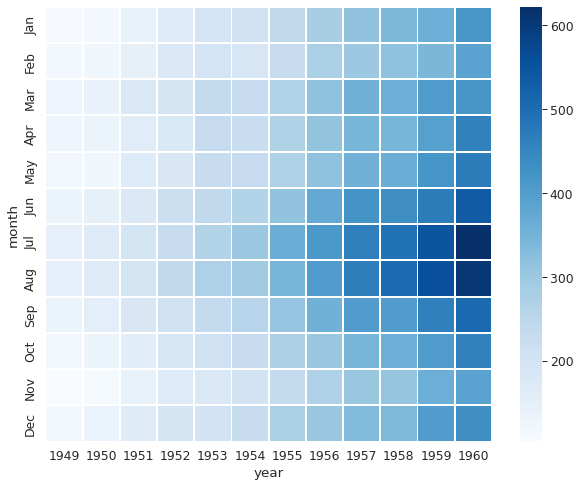

In [27]:
plt.figure(figsize = (10, 8))

flights = sns.load_dataset('flights')

flights = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')

sns.heatmap(flights, cmap = 'Blues', linecolor = 'white', linewidth = 1)

### Cluster Map

In [28]:
iris = sns.load_dataset('iris')

iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


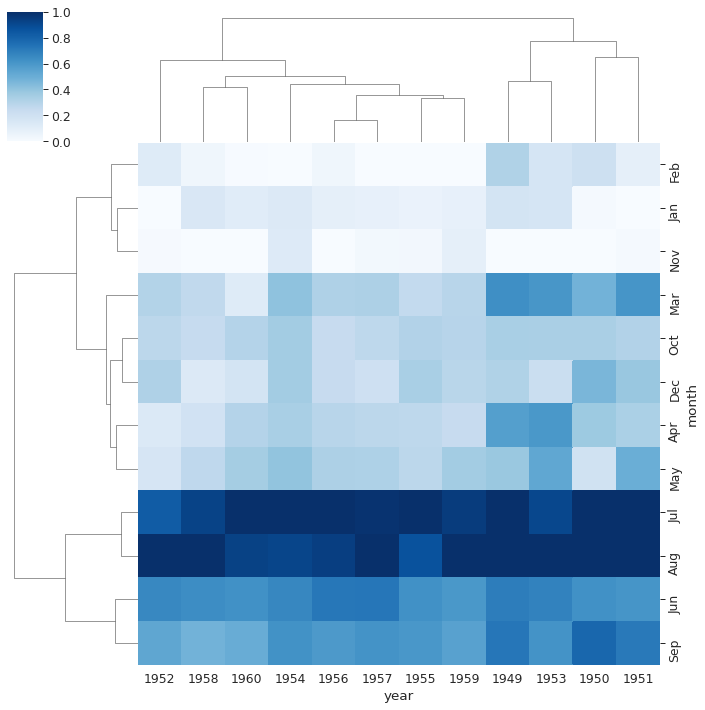

In [30]:
# dividing the different species

# species = iris.pop('species')

# sns.clustermap(iris)

sns.clustermap(flights, cmap = 'Blues', standard_scale = 1)

### Pair Grid

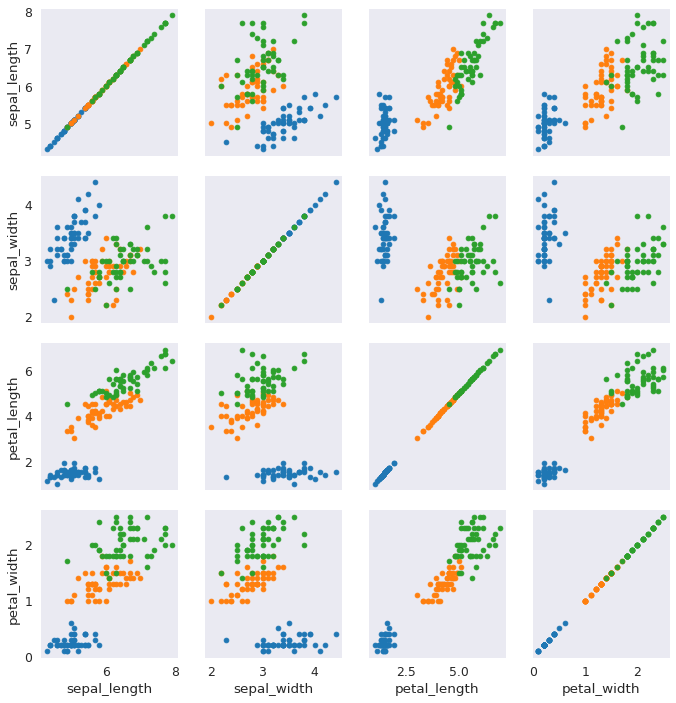

In [33]:
iris = sns.load_dataset('iris')

iris_g = sns.PairGrid(iris, hue = 'species')

iris_g.map(plt.scatter)

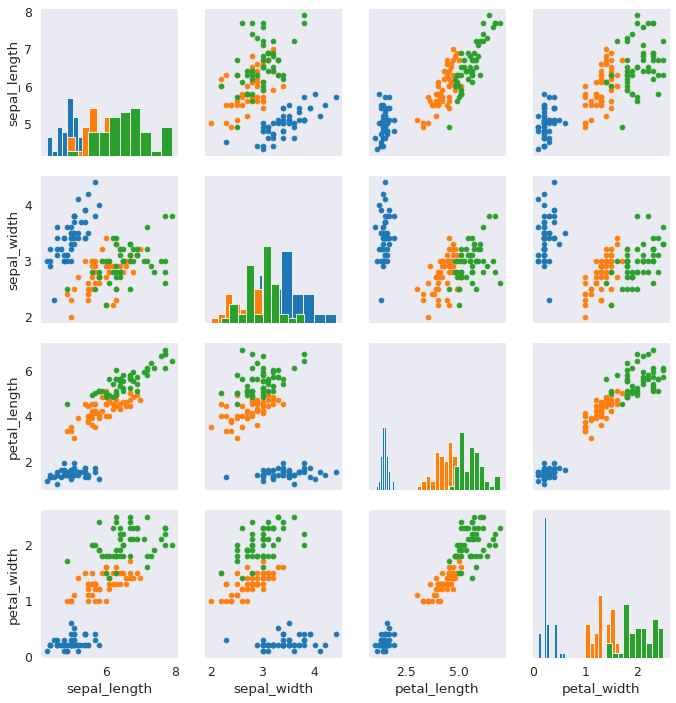

In [35]:
iris = sns.load_dataset('iris')

iris_g = sns.PairGrid(iris, hue = 'species')

iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

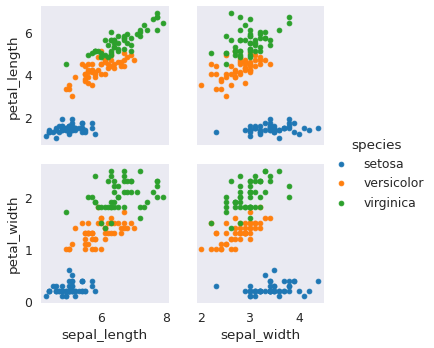

In [40]:
iris = sns.load_dataset('iris')

iris_g = sns.PairGrid(iris, hue = 'species', 
                      x_vars = ['sepal_length', 'sepal_width'], 
                      y_vars = ['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

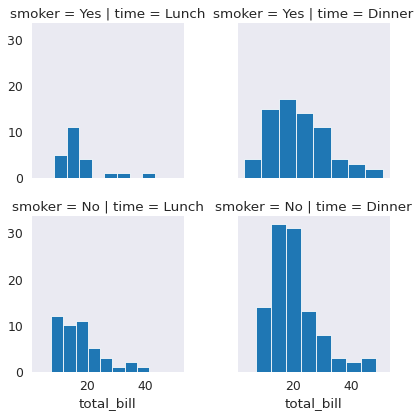

In [41]:
tips_fg = sns.FacetGrid(tips_df, col = 'time', row = 'smoker')

tips_fg.map(plt.hist, 'total_bill', bins = 8)

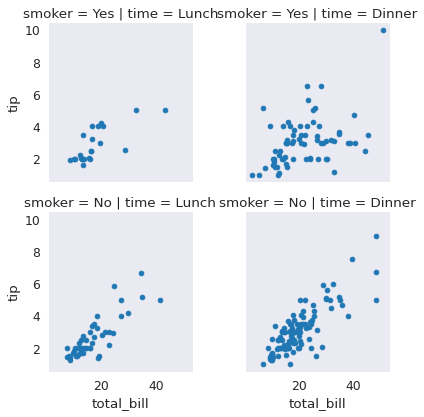

In [43]:
tips_fg = sns.FacetGrid(tips_df, col = 'time', row = 'smoker')

tips_fg.map(plt.scatter, 'total_bill', 'tip')

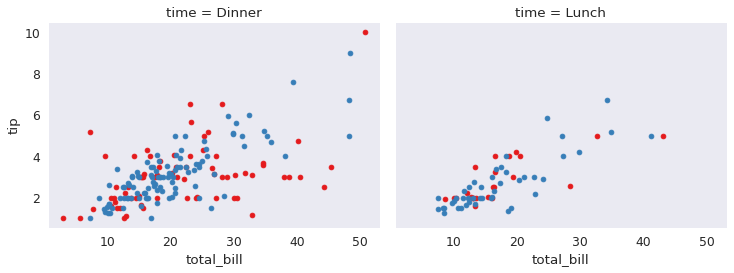

In [47]:
tips_fg = sns.FacetGrid(tips_df, col = 'time', hue = 'smoker', height = 4, aspect = 1.3, col_order = ['Dinner', 'Lunch'], palette = 'Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

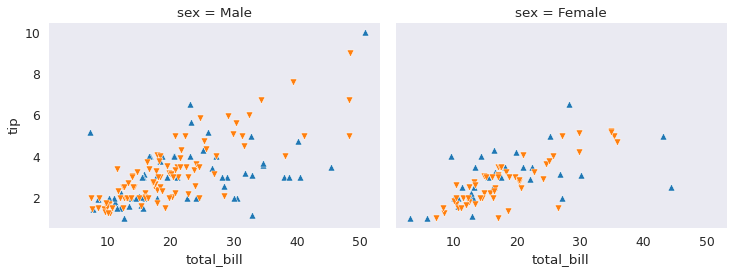

In [48]:
kws = dict(s = 50, linewidth = .5, edgecolor = 'w')
tips_fg = sns.FacetGrid(tips_df, col = 'sex', hue = 'smoker', height = 4, aspect = 1.3, 
                        hue_order = ['Yes', 'No'], 
                        hue_kws = dict(marker = ['^', 'v']))               #for smoker 

tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

### Regression Plots

In [50]:
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

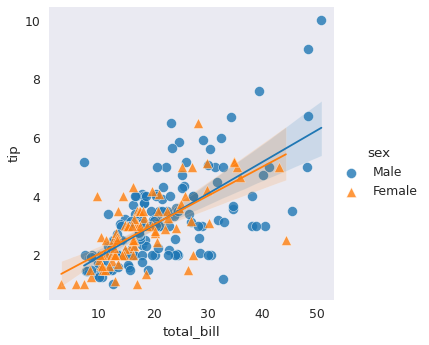

In [51]:
plt.figure(figsize = (8, 6))

sns.set_context('paper', font_scale = 1.4)

sns.lmplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips_df, markers = ['o', '^'], 
           scatter_kws = {'s' : 100, 'linewidth' : 0.5, 'edgecolor': 'w' })



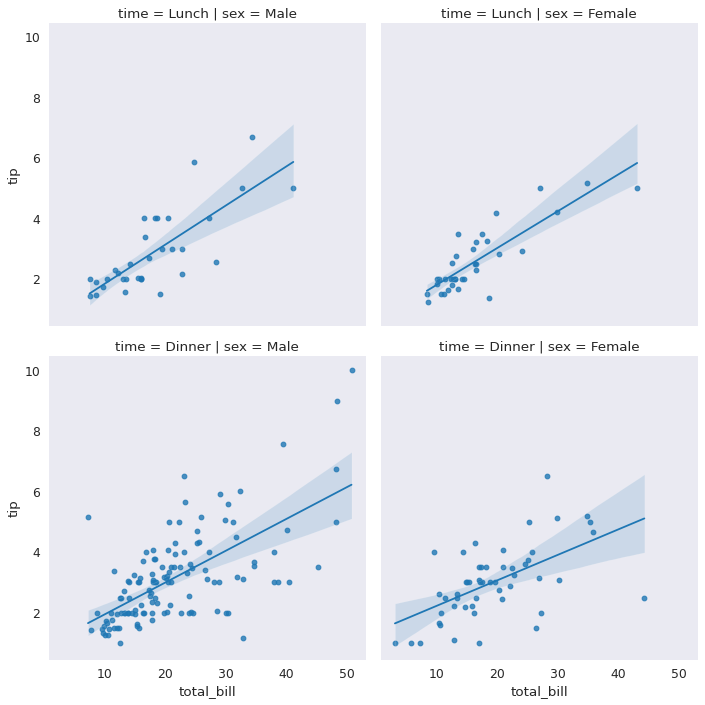

In [52]:
sns.set_context('paper', font_scale = 1.4)

sns.lmplot(x = 'total_bill', y = 'tip', col = 'sex', row = 'time', data = tips_df)